# Car rental price predictor : Preliminary EDA

The goal of this notebook is to explore the input dataset that we will use to train our models, to see if there are some preprocessings to do in order to improve performance. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import  StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png" #comment/delete this line if you want to show the figures in interactive format

In [2]:
df = pd.read_csv('training/input_data/get_around_pricing_project.csv', index_col = 0)
df

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,Toyota,39743,110,diesel,black,van,False,True,False,False,False,False,True,121
4839,Toyota,49832,100,diesel,grey,van,False,True,False,False,False,False,True,132
4840,Toyota,19633,110,diesel,grey,van,False,True,False,False,False,False,True,130
4841,Toyota,27920,110,diesel,brown,van,True,True,False,False,False,False,True,151


In [3]:
# Checking if there are missing values
df.isna().sum()

model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64

In [4]:
df.describe(include = 'all')

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4843 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   model_key                  4843 non-null   object
 1   mileage                    4843 non-null   int64 
 2   engine_power               4843 non-null   int64 
 3   fuel                       4843 non-null   object
 4   paint_color                4843 non-null   object
 5   car_type                   4843 non-null   object
 6   private_parking_available  4843 non-null   bool  
 7   has_gps                    4843 non-null   bool  
 8   has_air_conditioning       4843 non-null   bool  
 9   automatic_car              4843 non-null   bool  
 10  has_getaround_connect      4843 non-null   bool  
 11  has_speed_regulator        4843 non-null   bool  
 12  winter_tires               4843 non-null   bool  
 13  rental_price_per_day       4843 non-null   int64 
dtypes: bool(

## Looking for inconsistencies in the data

In [6]:
df[df['mileage'] < 0]

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
2938,Renault,-64,230,diesel,black,sedan,True,True,False,True,False,False,True,274


In [7]:
df[df['engine_power'] <= 0]

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
3765,Nissan,81770,0,diesel,white,suv,False,False,False,False,False,False,False,108


=> **As a negative mileage or a zero or negative engine power cannot correspond to a real-life situation, we will drop these 2 inconsistent lines.**

## Further analysis of features

In [8]:
target_col = 'rental_price_per_day'
y = df['rental_price_per_day']
y 

0       106
1       264
2       101
3       158
4       183
       ... 
4838    121
4839    132
4840    130
4841    151
4842    124
Name: rental_price_per_day, Length: 4843, dtype: int64

In [9]:
X = df.drop(target_col, axis = 1)
X

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,Toyota,39743,110,diesel,black,van,False,True,False,False,False,False,True
4839,Toyota,49832,100,diesel,grey,van,False,True,False,False,False,False,True
4840,Toyota,19633,110,diesel,grey,van,False,True,False,False,False,False,True
4841,Toyota,27920,110,diesel,brown,van,True,True,False,False,False,False,True


In [10]:
# Automatically detect names of numerical/categorical/boolean columns
numerical_features = []
binary_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numerical_features.append(i)
    elif ('bool' in str(t)):
        binary_features.append(i)
    else :
        categorical_features.append(i)

print('Found numerical features ', numerical_features)
print('Found binary features ', binary_features)
print('Found categorical features ', categorical_features)

Found numerical features  ['mileage', 'engine_power']
Found binary features  ['private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']
Found categorical features  ['model_key', 'fuel', 'paint_color', 'car_type']


### Categorical features distribution

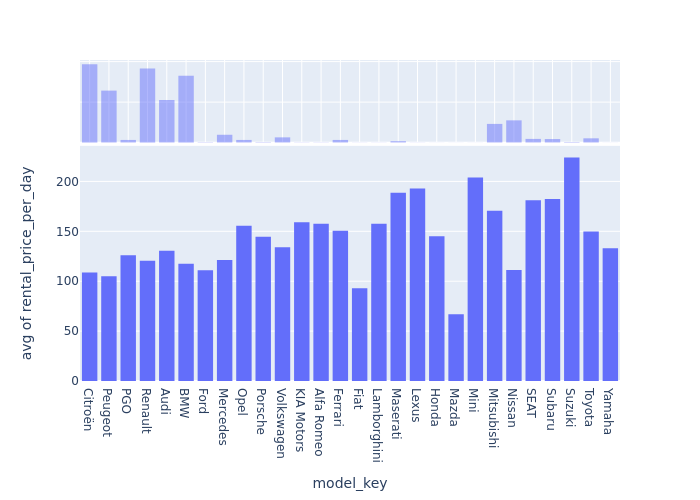

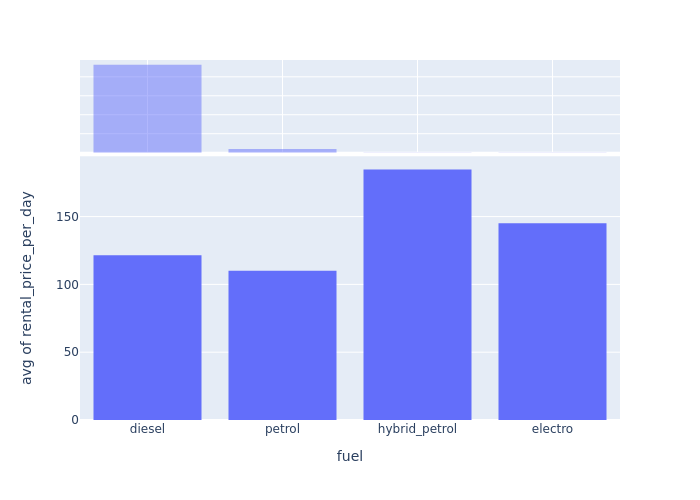

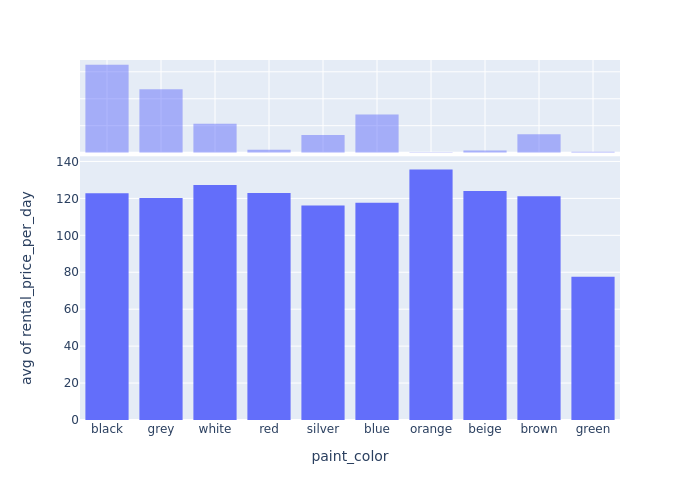

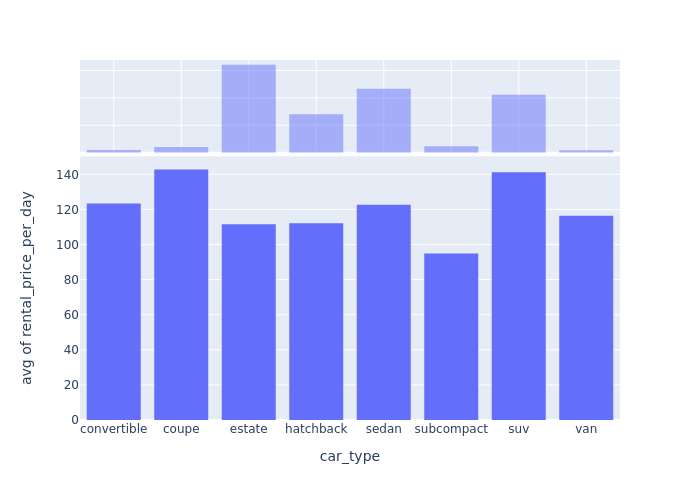

In [11]:
# Visualizing influence of each categorical feature on price
for feature in categorical_features:
    fig = px.histogram(df, x = feature, y = target_col, histfunc = 'avg', marginal = 'histogram')
    fig.show()

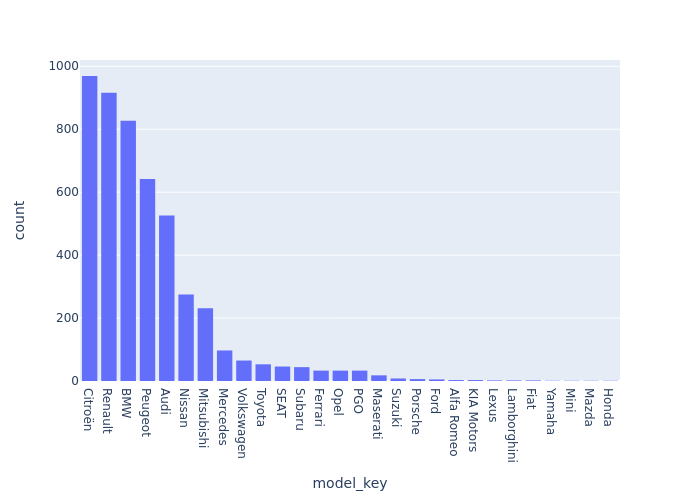

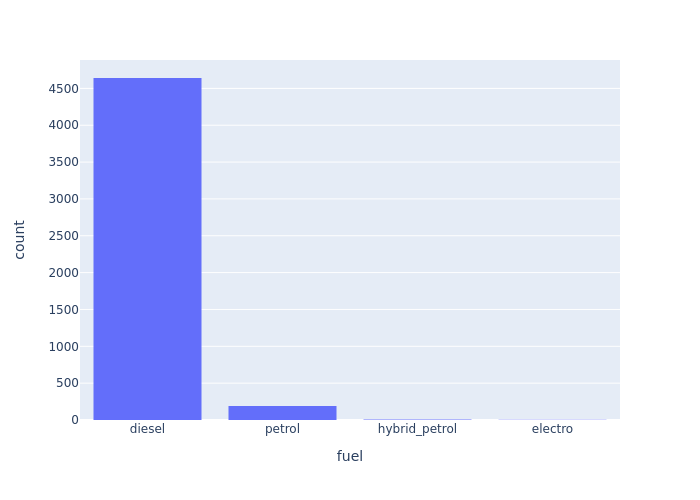

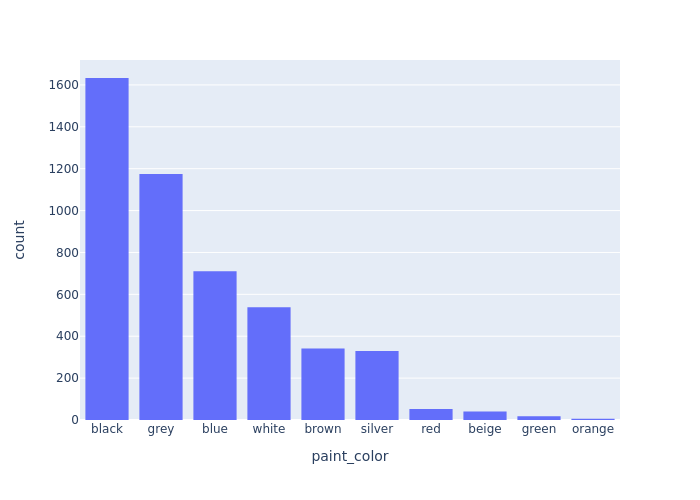

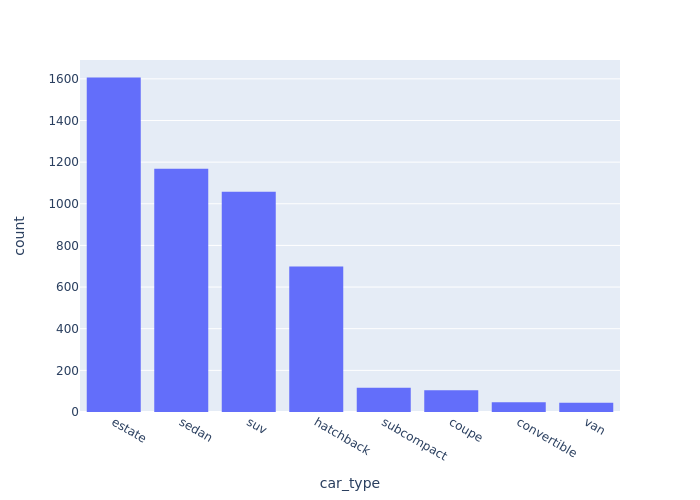

In [12]:
# Visualizing distribution of values for each categorical feature
for feature in categorical_features:
    fig = px.histogram(df, x = feature)
    fig.update_xaxes(categoryorder = 'total descending')
    fig.show()

**=> For certain features, especially the model_key or color, there are a lot of unique possible values, including many very fewly populated. To avoid having too much overfitting when training the models, we will regroup some of these fewly populated values :** 

In [13]:
# Regroup fewly-populated category labels in label 'other'
for feature in categorical_features:
    label_counts = df[feature].value_counts()
    fewly_populated_labels = list(label_counts[label_counts < 0.5 / 100 * len(df)].index)
    for label in fewly_populated_labels:
        df.loc[df[feature]==label,feature] = 'other'
        print(f"Replaced '{label}' label in '{feature}' feature by 'other'")
X = df.drop(target_col, axis = 1)

Replaced 'Maserati' label in 'model_key' feature by 'other'
Replaced 'Suzuki' label in 'model_key' feature by 'other'
Replaced 'Porsche' label in 'model_key' feature by 'other'
Replaced 'Ford' label in 'model_key' feature by 'other'
Replaced 'KIA Motors' label in 'model_key' feature by 'other'
Replaced 'Alfa Romeo' label in 'model_key' feature by 'other'
Replaced 'Fiat' label in 'model_key' feature by 'other'
Replaced 'Lexus' label in 'model_key' feature by 'other'
Replaced 'Lamborghini' label in 'model_key' feature by 'other'
Replaced 'Mini' label in 'model_key' feature by 'other'
Replaced 'Mazda' label in 'model_key' feature by 'other'
Replaced 'Honda' label in 'model_key' feature by 'other'
Replaced 'Yamaha' label in 'model_key' feature by 'other'
Replaced 'hybrid_petrol' label in 'fuel' feature by 'other'
Replaced 'electro' label in 'fuel' feature by 'other'
Replaced 'green' label in 'paint_color' feature by 'other'
Replaced 'orange' label in 'paint_color' feature by 'other'


**Results after regrouping fewly-populated values :**

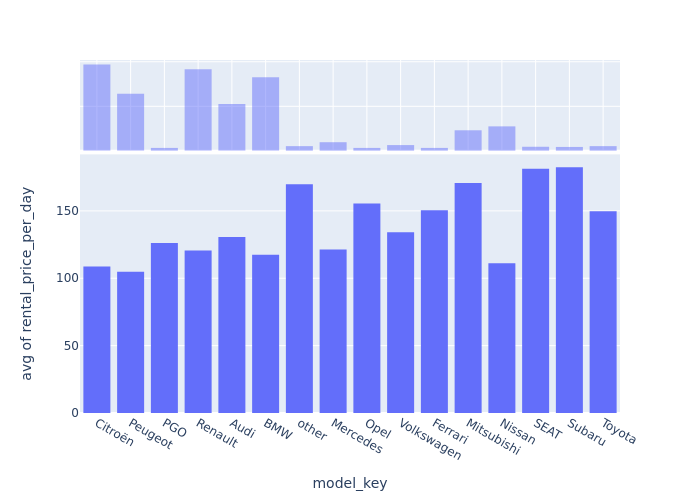

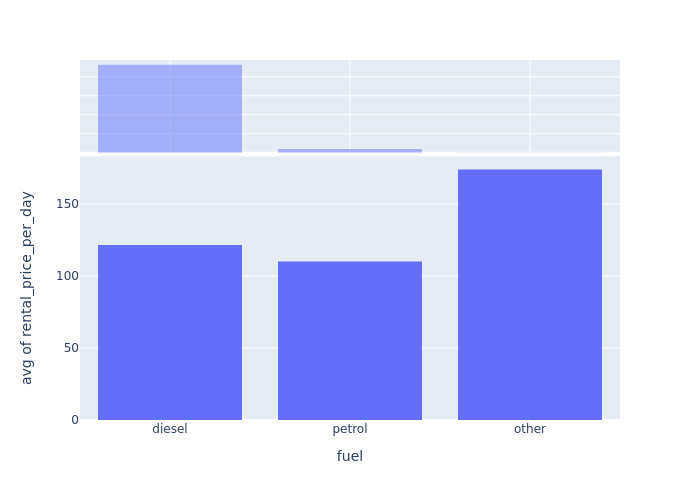

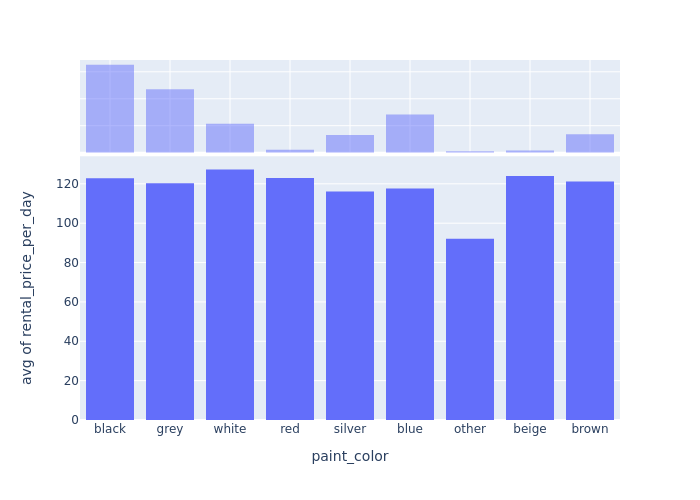

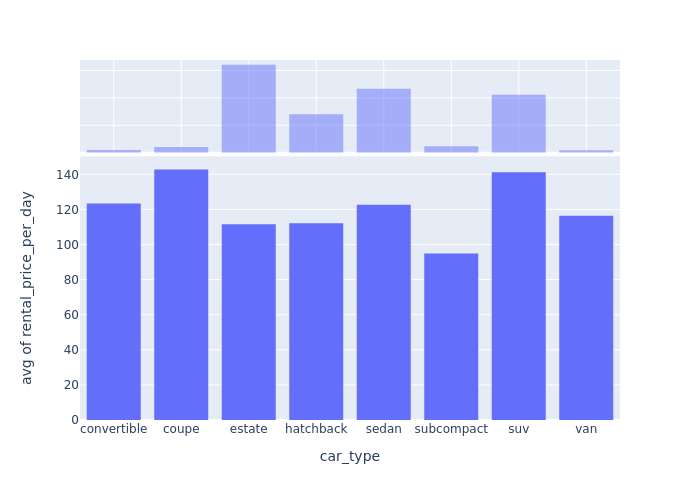

In [14]:
# Visualizing influence of each categorical feature on price
for feature in categorical_features:
    fig = px.histogram(df, x = feature, y = target_col, histfunc = 'avg', marginal = 'histogram')
    fig.show()

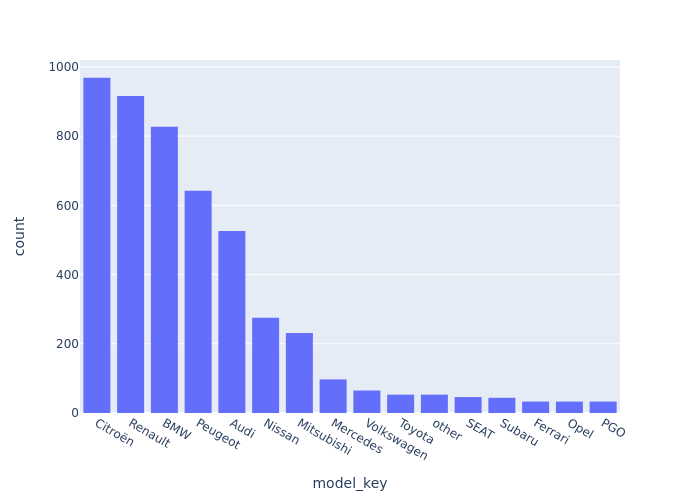

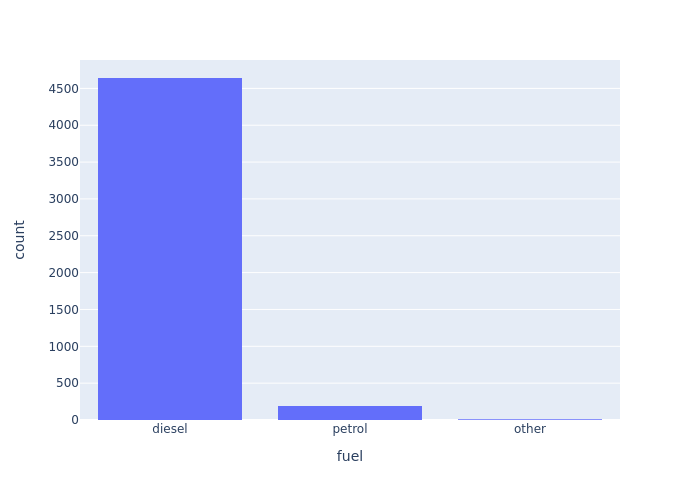

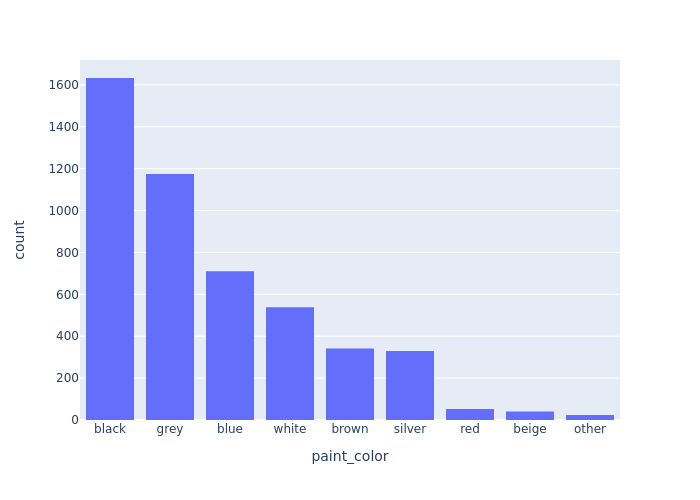

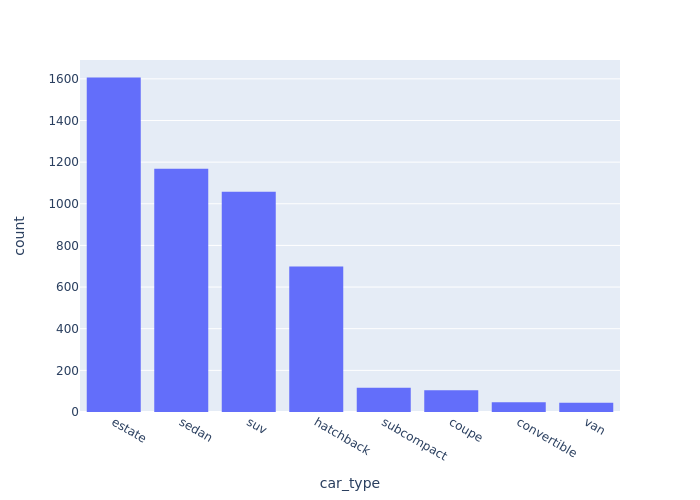

In [15]:
# Visualizing distribution of values for each categorical feature
for feature in categorical_features:
    fig = px.histogram(df, x = feature)
    fig.update_xaxes(categoryorder = 'total descending')
    fig.show()

In [16]:
# Get valid inputs list for categorical features (to use them in input validation in the model's API)
for feature in categorical_features:
    print(df[feature].unique())

['Citroën' 'Peugeot' 'PGO' 'Renault' 'Audi' 'BMW' 'other' 'Mercedes'
 'Opel' 'Volkswagen' 'Ferrari' 'Mitsubishi' 'Nissan' 'SEAT' 'Subaru'
 'Toyota']
['diesel' 'petrol' 'other']
['black' 'grey' 'white' 'red' 'silver' 'blue' 'other' 'beige' 'brown']
['convertible' 'coupe' 'estate' 'hatchback' 'sedan' 'subcompact' 'suv'
 'van']


### Correlation analysis

In [17]:
# Preprocessing for features correlation analysis (that's why we don't drop columns in OHE here)
categorical_transformer = OneHotEncoder(drop=None, handle_unknown='error', sparse=False)
numerical_transformer = StandardScaler()
binary_transformer = FunctionTransformer(None, feature_names_out = 'one-to-one') #identity function
feature_preprocessor = ColumnTransformer(
        transformers=[
            ("categorical_transformer", categorical_transformer, categorical_features),
            ("numerical_transformer", numerical_transformer, numerical_features),
            ("binary_transformer", binary_transformer, binary_features)
        ]
    )

In [18]:
feature_preprocessor.fit(X)

ColumnTransformer(transformers=[('categorical_transformer',
                                 OneHotEncoder(sparse=False),
                                 ['model_key', 'fuel', 'paint_color',
                                  'car_type']),
                                ('numerical_transformer', StandardScaler(),
                                 ['mileage', 'engine_power']),
                                ('binary_transformer',
                                 FunctionTransformer(feature_names_out='one-to-one'),
                                 ['private_parking_available', 'has_gps',
                                  'has_air_conditioning', 'automatic_car',
                                  'has_getaround_connect',
                                  'has_speed_regulator', 'winter_tires'])])

In [19]:
feature_names_out = [feature_name.replace("categorical_transformer__","").replace("numerical_transformer__","").replace("binary_transformer__","") for feature_name in feature_preprocessor.get_feature_names_out()]
print(feature_names_out)

['model_key_Audi', 'model_key_BMW', 'model_key_Citroën', 'model_key_Ferrari', 'model_key_Mercedes', 'model_key_Mitsubishi', 'model_key_Nissan', 'model_key_Opel', 'model_key_PGO', 'model_key_Peugeot', 'model_key_Renault', 'model_key_SEAT', 'model_key_Subaru', 'model_key_Toyota', 'model_key_Volkswagen', 'model_key_other', 'fuel_diesel', 'fuel_other', 'fuel_petrol', 'paint_color_beige', 'paint_color_black', 'paint_color_blue', 'paint_color_brown', 'paint_color_grey', 'paint_color_other', 'paint_color_red', 'paint_color_silver', 'paint_color_white', 'car_type_convertible', 'car_type_coupe', 'car_type_estate', 'car_type_hatchback', 'car_type_sedan', 'car_type_subcompact', 'car_type_suv', 'car_type_van', 'mileage', 'engine_power', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']


In [20]:
X_preprocessed = pd.DataFrame(feature_preprocessor.transform(df),
                            columns = feature_names_out,
                            index = df.index)
X_preprocessed

,model_key_Audi,model_key_BMW,model_key_Citroën,model_key_Ferrari,model_key_Mercedes,model_key_Mitsubishi,model_key_Nissan,model_key_Opel,model_key_PGO,model_key_Peugeot,...,car_type_van,mileage,engine_power,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.009168,-0.743491,1.0,1.0,0.0,0.0,1.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.110528,4.822133,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.703337,-0.230530,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.214781,0.154190,1.0,1.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.728782,0.795391,1.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-1.681657,-0.487011,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-1.514039,-0.743491,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-2.015762,-0.487011,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-1.878083,-0.487011,1.0,1.0,0.0,0.0,0.0,0.0,1.0


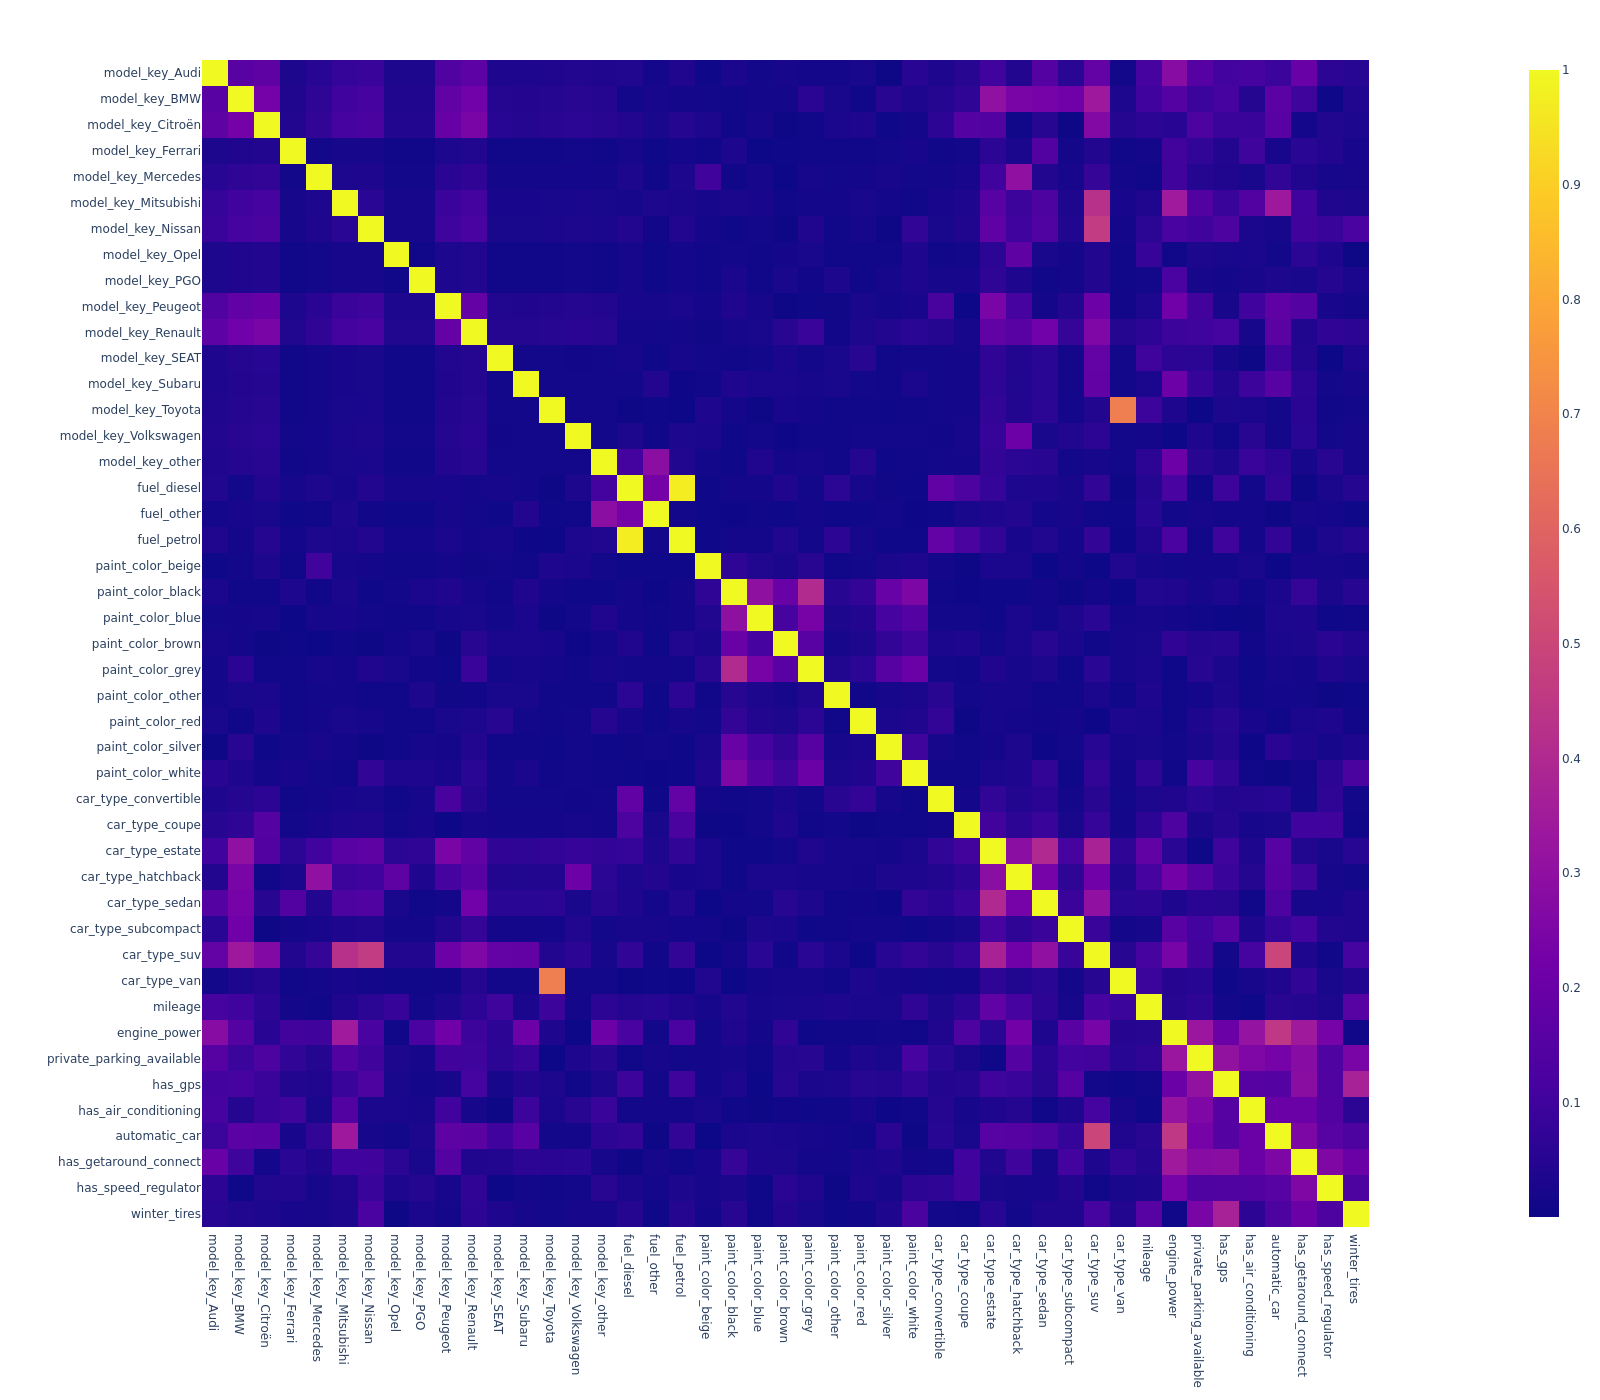

In [21]:
corr_preprocessed = X_preprocessed.corr().abs()
px.imshow(corr_preprocessed, height = 1400, width = 1600)

**=> The diesel and petrol values for fuel seem very correlated, but it is only due to the fact that other values are very fewly-populated, and it is hence not a direct correlation**  

In [22]:
def colinearity_search(dataframe):
    found_colinearity = False
    for i, col in enumerate(dataframe.columns):
        for row in dataframe.index[i+1:]:
            if round(dataframe.loc[row,col],3)==1:
                print(f"Found colinearity between features {row} and {col}")
                found_colinearity = True
    if not found_colinearity:
        print("No direct correlation found between features in the dataset")

colinearity_search(corr_preprocessed)

No direct correlation found between features in the dataset


**=> No direct correlation found between features, no need to drop some**